# Pymaceuticals Inc.
---

### Analysis

- Study Overview
In this study, 249 mice diagnosed with SCC tumors were treated with various drug regimens over a period of 45 days. The primary objective was to evaluate the performance of Pymaceuticals’ drug of interest, Capomulin, compared to other treatment regimens.

Summary Statistics and Treatment Efficacy
The summary statistics reveal that the drug regimen Ramicane exhibits the lowest mean tumor volume across different time points, closely followed by Capomulin. Although the mean volume difference between these two drugs is minimal (only 0.2 mm³), it prompts further investigation into the effectiveness of Ramicane.

Observations of Treatment Regimens
A bar graph illustrating the number of observed mice timepoints versus drug regimen shows a higher frequency of recorded observations for both Capomulin and Ramicane. This suggests that these two regimens were monitored more closely, indicating a greater level of interest or efficacy in their effects.

Gender Distribution in Study Subjects
Analysis of the gender of the mice indicates that it does not play a significant role in the efficacy of the drug regimens. The study utilized an equal number of male and female mice, as reflected in the pie chart showcasing the distribution of unique female versus male subjects.

Distribution of Tumor Volume by Treatment Group
The box plot displaying the distribution of tumor volumes for each treatment group highlights notable findings:

The box plot for Capomulin is smaller, indicating that mice treated with this drug experienced relatively small and consistent tumor volumes, suggesting effective and reliable treatment outcomes.
In contrast, Infubinol displays potential outliers, which may represent exceptional cases where certain mice exhibited either significantly faster or slower tumor growth.
Temporal Effects of Capomulin Treatment
A line plot illustrating tumor volume vs. time points for a single mouse treated with Capomulin reveals critical insights into the drug's efficacy over time. Initially, there is a slight increase in tumor volume for approximately 20 days, indicating that the drug takes time to exert its effects. However, after this initial period, a clear reduction in tumor volume becomes evident, suggesting the effectiveness of Capomulin in managing tumor growth.

Correlation Between Mouse Weight and Tumor Volume
Data analysis across a weight category of mice (ranging from 10 to 25 kg) reveals a linear dependency between mouse weight and average tumor volume for the Capomulin regimen. The correlation coefficient of 0.8 indicates a strong positive correlation, meaning that as mouse weight increases, so does average tumor volume. Furthermore, the R-squared value of 70.89% suggests that approximately 70.89% of the variance in average tumor volume can be attributed to mouse weight, highlighting its significance as a predictor of tumor size.

Conclusion
In summary, the study provides valuable insights into the efficacy of various drug regimens for SCC tumors. Ramicane shows promising results with the lowest mean tumor volume, while Capomulin demonstrates effective long-term treatment outcomes. Gender does not significantly impact treatment efficacy, and mouse weight appears to be a critical factor in predicting tumor volume. Further investigation is warranted to explore these relationships and optimize treatment strategies.


 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(study_results, mouse_metadata,how="left", on="Mouse ID")


# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice.
num_mice = data_complete['Mouse ID'].nunique()
num_mice

249

In [34]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = data_complete.loc[data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False),"Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [35]:
# Optional: Get all the data for the duplicate mouse ID.


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

for ID in duplicate_mice:
   clean_df = data_complete.loc[data_complete["Mouse ID"] != ID]

# Display the cleaned DataFrame
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [33]:
# Checking the number of mice in the clean DataFrame.
new_mice_count= clean_df['Mouse ID'].nunique()
new_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

data_summary=clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(['mean', 'median', 'var','std','sem'])

# Assemble the resulting series into a single summary DataFrame.
data_summary = data_summary.rename(columns={'mean': 'Tumor Volume Mean', 'median': 'Tumor Volume Median', 'var': 'Tumor Volume Variance','std':'Tumor Volume Std. Dev.','sem':'Tumor Volume Std. Err.'})
data_summary


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

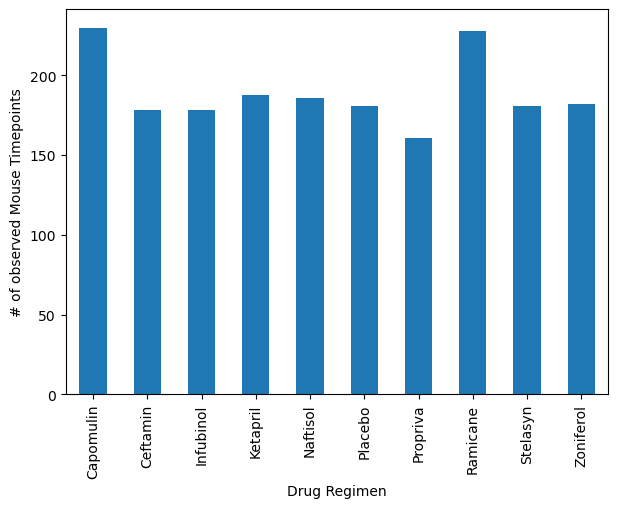

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df.groupby('Drug Regimen')['Mouse ID'].count()

regimen_counts.plot(kind='bar', figsize=(7, 5))

plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')

plt.show()



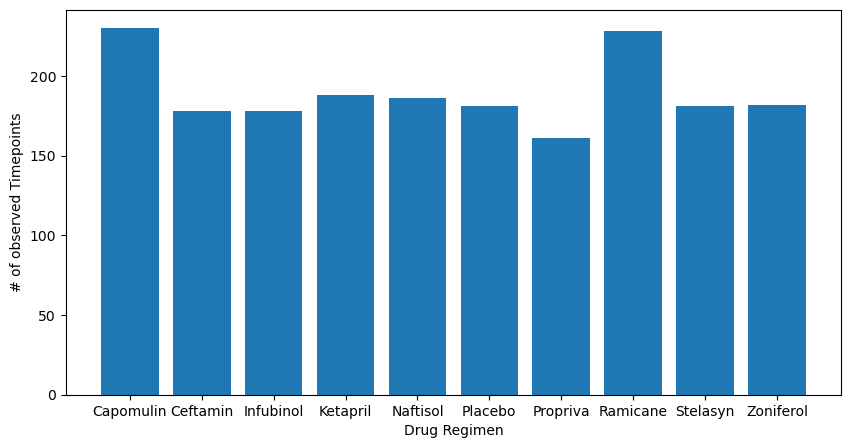

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 5))
plt.bar(regimen_counts.index, regimen_counts.values)

plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Timepoints')

plt.show()

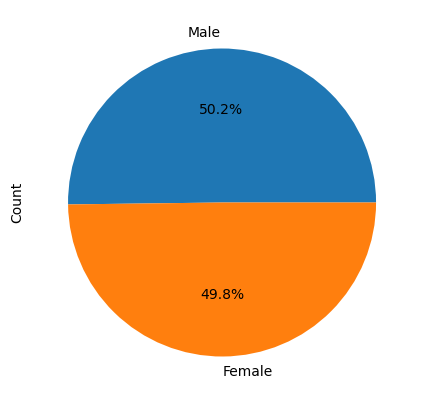

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_df.drop_duplicates(subset='Mouse ID')
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5), startangle=0)

plt.ylabel('Count')  
plt.show()

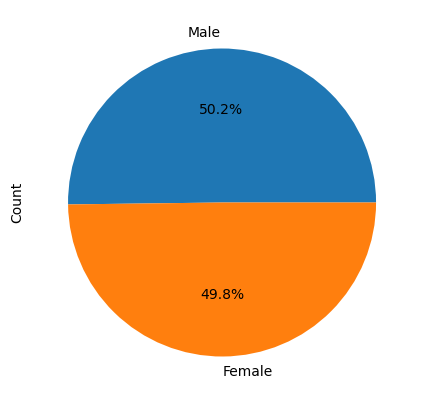

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0)


plt.ylabel('Count')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'])
print(final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
2       a262      Placebo           70.717621
3       a275     Ceftamin           62.999356
4       a366     Stelasyn           63.440686
..       ...          ...                 ...
244     z435     Propriva           48.710661
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451
247     z795     Naftisol           65.741070
248     z969     Naftisol           73.867845

[249 rows x 3 columns]


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    
    # add subset
    tumor_vol_data.append(tumor_volumes)
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]


    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - (1.5 * IQR)
    upper_bound = quartiles[0.75] + (1.5 * IQR)

    print(f"{treatment} - IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]}\n")

Capomulin - IQR: 7.781863460000004, Lower Bound: 20.70456164999999, Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane - IQR: 9.098536719999998, Lower Bound: 17.912664470000003, Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol - IQR: 11.477135160000003, Lower Bound: 36.83290494999999, Upper Bound: 82.74144559000001
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin - IQR: 15.577752179999997, Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



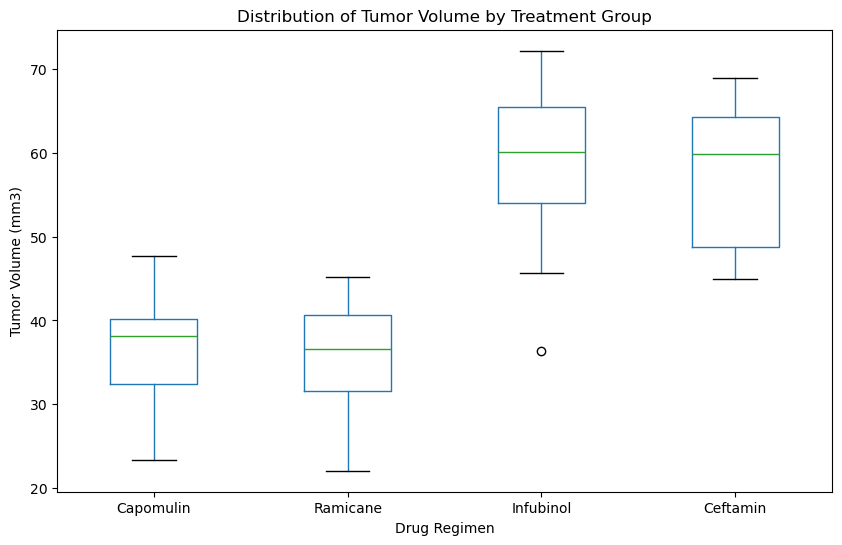

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_vol_df = pd.DataFrame(tumor_vol_data).T  # Transpose to have treatments as columns

# Step to create a box plot
plt.figure(figsize=(10, 6))
tumor_vol_df.boxplot(grid=False)
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(ticks=[1, 2, 3, 4], labels=treatments)  # Set x-tick labels to treatment names
plt.show()

## Line and Scatter Plots

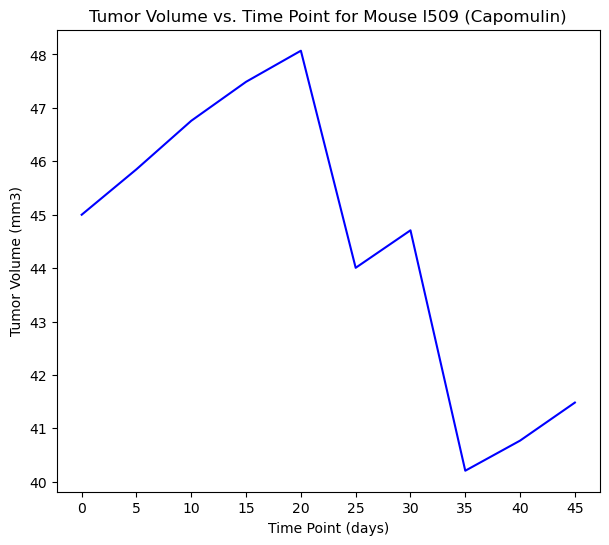

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'  # Change this to the ID of the mouse you want to plot
mouse_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]

# Step 2: Create a line plot of tumor volume vs. time point
plt.figure(figsize=(7, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'],  linestyle='-', color='b')

# Step 3: Customize the plot
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(mouse_data['Timepoint'])  # Set x-ticks to the time points

plt.show()

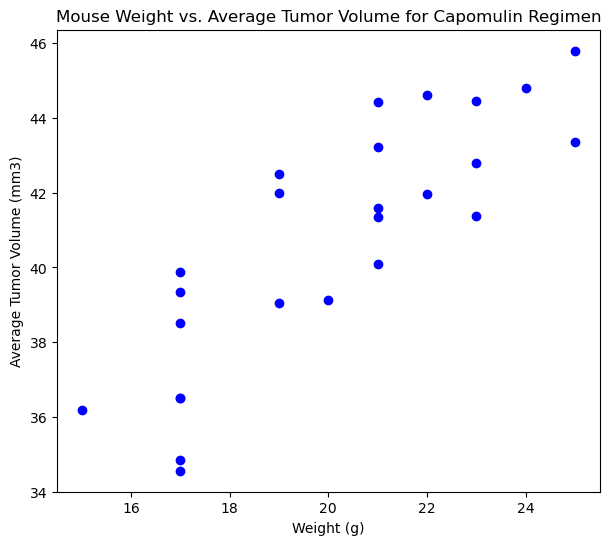

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Step 2: Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()

# Step 3: Create a scatter plot
plt.figure(figsize=(7, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='b', marker='o')

# Step 4: Customize the plot
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.8419363424694722
Linear regression results:
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723


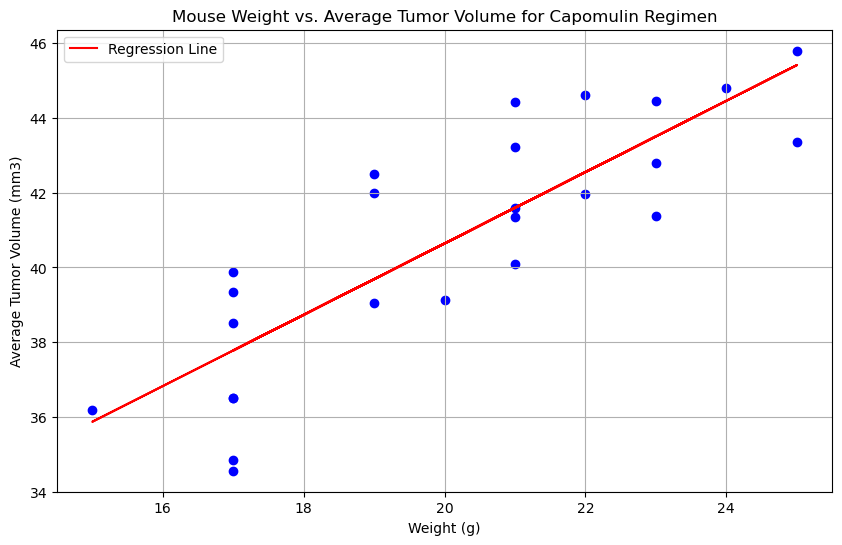

In [19]:
# Calculate the correlation coefficient and a linear regression model
from scipy.stats import linregress
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Step 1: Filter the DataFrame for Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Step 2: Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()

# Step 3: Calculate the correlation coefficient
correlation = average_tumor_volume['Weight (g)'].corr(average_tumor_volume['Tumor Volume (mm3)'])
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation}")

# Step 4: Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Print the linear regression results
print(f"Linear regression results:\nSlope: {slope}\nIntercept: {intercept}\nR-squared: {r_value**2}")

# Step 5: Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='b', marker='o')
plt.plot(average_tumor_volume['Weight (g)'], intercept + slope * average_tumor_volume['Weight (g)'], color='r', label='Regression Line')

# Customize the plot
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid()
plt.show()